In [1]:
import tensorflow as tf
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [9]:
# TF檔
filename = './data/Train.tfrecords'

# 產生文件名隊列
filename_queue = tf.train.string_input_producer([filename], 
                                                 shuffle=True, 
                                                 num_epochs=3)

# 數據讀取器
reader = tf.TFRecordReader()
key, serialized_example = reader.read(filename_queue)

# 數據解析
img_features = tf.parse_single_example(
            serialized_example,
            features={ 'Label'    : tf.FixedLenFeature([], tf.int64),
                       'image_raw': tf.FixedLenFeature([], tf.string),
                       'height':tf.FixedLenFeature([],tf.int64),
                       'width':tf.FixedLenFeature([],tf.int64),
                       'channel':tf.FixedLenFeature([],tf.int64)})


height = tf.cast(img_features['height'], tf.int64)
width = tf.cast(img_features['width'], tf.int64)
channel = tf.cast(img_features['channel'], tf.int64)
#image_shape = tf.parallel_stack([height, width, channel])

image = tf.decode_raw(img_features['image_raw'], tf.uint8)
image = tf.reshape(image, [299,299,3])
label = tf.cast(img_features['Label'], tf.int64)

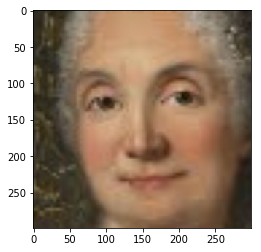

599


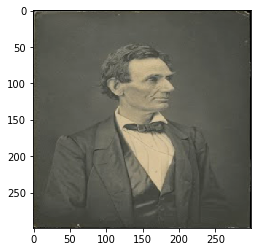

296


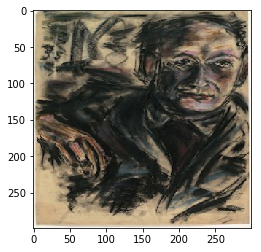

544


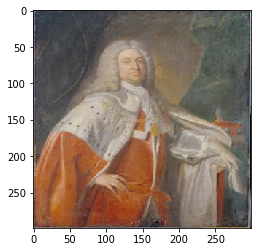

537


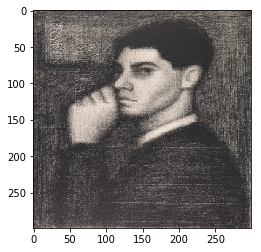

98


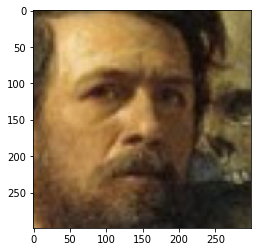

736


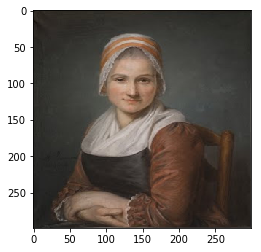

687


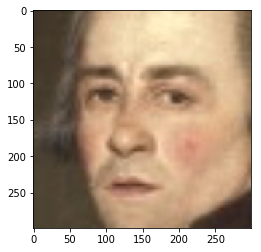

138


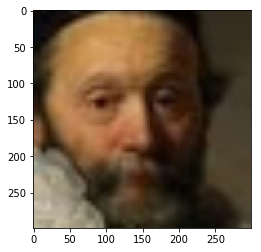

484


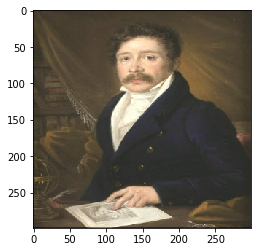

5
Done!


In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    
    coord = tf.train.Coordinator()
    
    # 啟動文件隊列，開始讀取文件
    threads = tf.train.start_queue_runners(coord=coord)

    count = 0 
    try:
        while count<10:
            
            # 這邊讀取
            image_data, label_data = sess.run([image, label])
#             image_data = cv2.cvtColor(image_data,cv2.COLOR_BAYER_GB2RGB)
            plt.imshow(image_data)
            plt.show()
            print(label_data)
            count +=1

        print('Done!')        
        
    except tf.errors.OutOfRangeError:
        print('Done!')

    finally:
        coord.request_stop()
    
    coord.join(threads)